# MLP Time Scatter Plot

In [8]:
import pandas as pd

Scatter plot saved as MLP_timeF1score_scatterplot_A100_12jan25.png
Scatter plot saved as MLP_timeF1score_scatterplot_A100_12jan25.svg


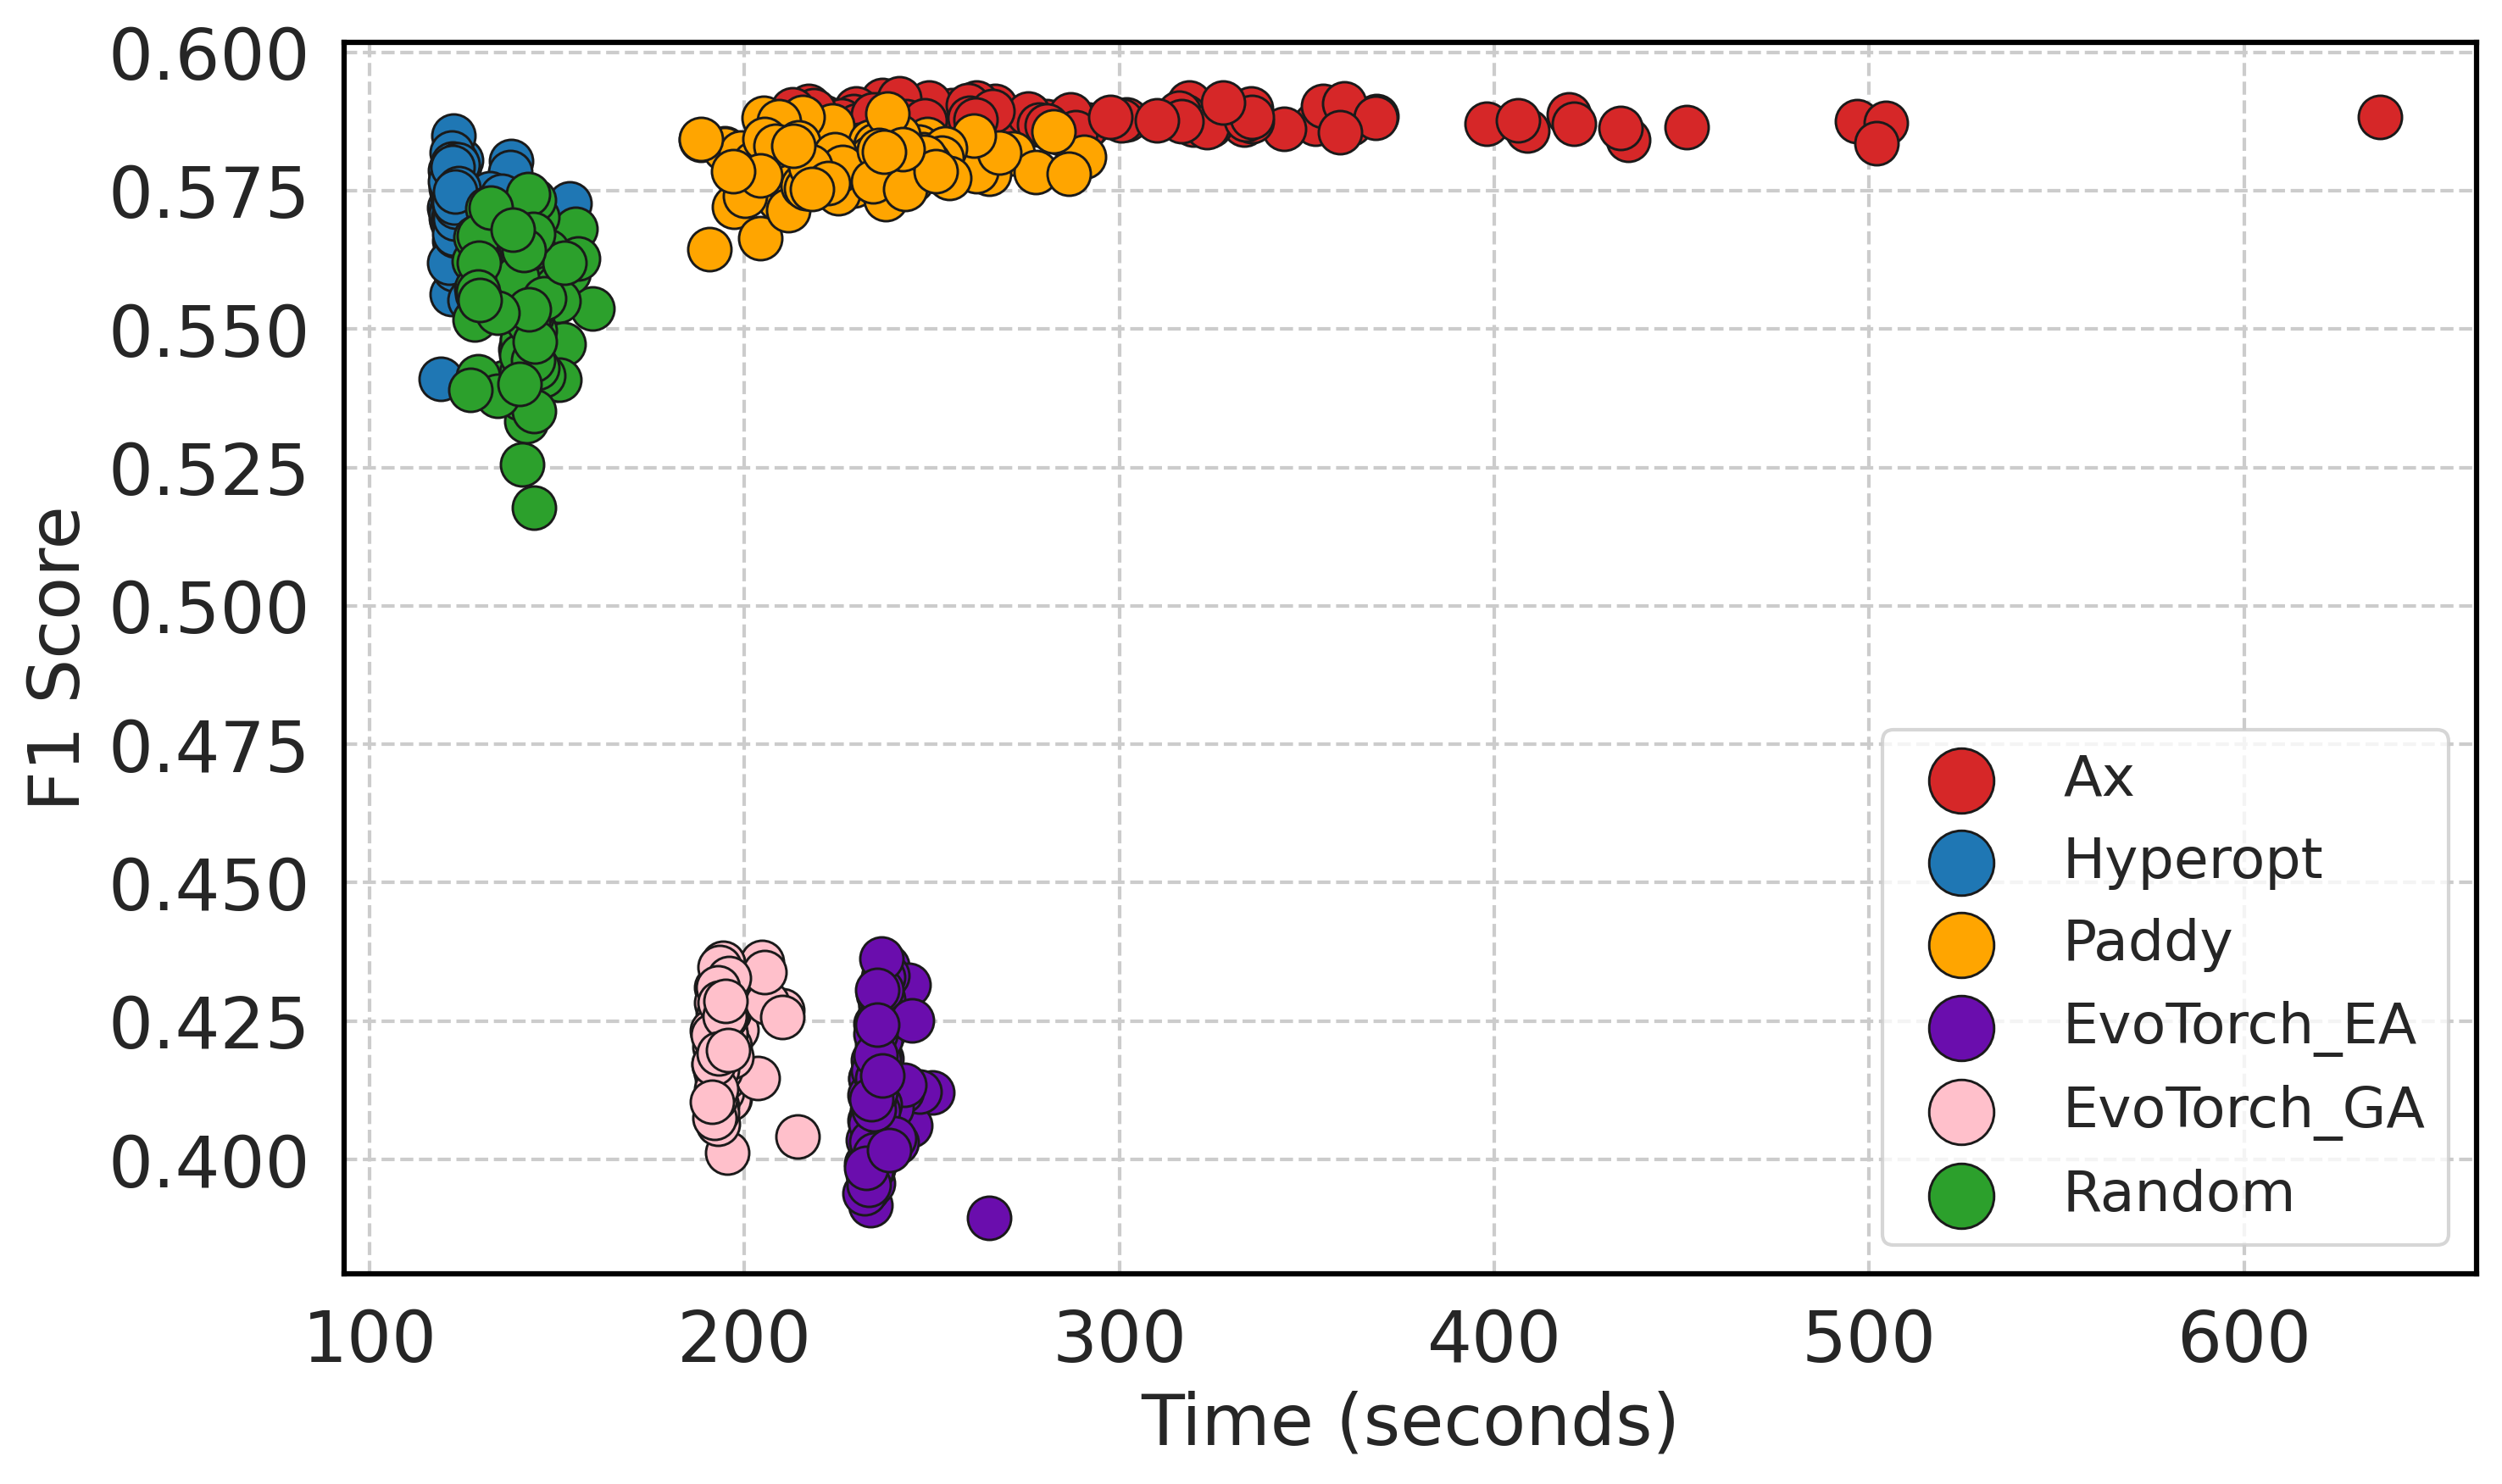

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib as mpl

def plot_scatter_multiple_files(file_paths, label_mapping, color_mapping=None, figsize=(10, 6), 
                                png_filename='scatter_plot.png', svg_filename='scatter_plot.svg'):
    """
    Plots a scatter plot of Time vs F1_Score for multiple files with custom labels and colors,
    and saves the plot in both PNG and SVG formats.

    Parameters:
    - file_paths (list of str): List of file paths to import data from.
    - label_mapping (dict): Dictionary mapping file names to custom labels.
                             Example: {'file1.csv': 'Ax', 'file2.csv': 'Bx'}
    - color_mapping (dict, optional): Dictionary mapping labels to specific colors.
                                     Example: {'Ax': '#D62728', 'Bx': '#FFC0CB'}
    - figsize (tuple, optional): Size of the matplotlib figure. Default is (10, 6).
    - png_filename (str, optional): Filename for saving the plot in PNG format. Default is 'scatter_plot.png'.
    - svg_filename (str, optional): Filename for saving the plot in SVG format. Default is 'scatter_plot.svg'.
    """
    # Set global font and SVG settings
    mpl.rcParams['svg.fonttype'] = 'none'  # Keep text as text in SVG
    plt.rcParams['font.family'] = 'Arial'  # Use a universal font

    # Use Seaborn for enhanced aesthetics
    sns.set(style="whitegrid")

    # Initialize the plot with specified DPI for high-resolution output
    plt.figure(figsize=figsize, dpi=300)

    # Define a default soft color palette for labels without specific color assignments
    default_soft_colors = [
        '#70C1B3',  # Muted Teal
        '#B2DBBF',  # Soft Green
        '#F3FFBD',  # Pale Yellow
        '#FFB347',  # Soft Orange
        '#FFAAA5',  # Soft Red
        '#77DD77',  # Soft Green
        '#CFCFC4',  # Pastel Gray
        '#836953',  # Pastel Brown
        '#A8D5BA'   # Another Soft Green
    ]

    # Initialize color index for default colors
    color_idx = 0

    # Keep track of used labels to avoid duplicate legend entries
    used_labels = set()

    for file_path in file_paths:
        # Extract the file name from the path
        file_name = os.path.basename(file_path)
        
        # Get the custom label; use file name if not provided in mapping
        label = label_mapping.get(file_name, file_name)
        
        # Assign color based on color_mapping; fallback to default palette
        if color_mapping and label in color_mapping:
            color = color_mapping[label]
        else:
            color = default_soft_colors[color_idx % len(default_soft_colors)]
            color_idx += 1

        try:
            # Read the data
            df = pd.read_csv(file_path)

            # Check if required columns exist
            if not {'Time', 'F1_Score'}.issubset(df.columns):
                print(f"Warning: 'Time' or 'F1_Score' column missing in {file_name}. Skipping this file.")
                continue

            # Plot the scatter points with updated settings
            plt.scatter(
                df['Time'], 
                df['F1_Score'], 
                color=color, 
                alpha=1.0,           # Fully opaque markers
                edgecolors='k',      # Black edges for better contrast
                linewidth=0.7,       # Slight edge linewidth for clarity
                s=150,               # Adjusted size for better balance
                label=label if label not in used_labels else "",
                marker='o'           # Circle marker for better visibility
            )

            used_labels.add(label)  # Add label to the set after plotting
        except FileNotFoundError:
            print(f"Error: File {file_path} not found. Skipping this file.")
        except pd.errors.EmptyDataError:
            print(f"Error: File {file_path} is empty. Skipping this file.")
        except Exception as e:
            print(f"An error occurred while processing {file_path}: {e}. Skipping this file.")

    # Label the axes
    plt.xlabel('Time (seconds)', fontsize=20)
    plt.ylabel('F1 Score', fontsize=20)
    
    # Set tick label sizes
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # Add gridlines for easier interpretation with no transparency
    plt.grid(True, linestyle='--', alpha=1.0)  # Changed alpha from 0.3 to 1.0

    # Set the spine colors to black
    ax = plt.gca()  # Get current Axes
    for spine in ax.spines.values():
        spine.set_edgecolor('black')  # Set spine color to black
        spine.set_linewidth(1.5)      # Optional: Set spine linewidth for better visibility

    # Add a legend with larger markers at the bottom right
    plt.legend(fontsize=16, title_fontsize=16, markerscale=1.5, frameon=True, loc='lower right')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Save the plot as PNG
    plt.savefig(png_filename, dpi=300, bbox_inches='tight')
    print(f"Scatter plot saved as {png_filename}")

    # Save the plot as SVG
    plt.savefig(svg_filename, format='svg', dpi=300, bbox_inches='tight')
    print(f"Scatter plot saved as {svg_filename}")

    # Show the plot
    plt.show()

# Example Usage:

# List of file paths
file_paths = [
    '../BO/Ax/mlp_AX_27Nov_Paper_150it_7496822_REPEAT_Summary_TIME.csv',
    '../BO/hyperopt/MLP_Hyperopt_10Jan25_7704199_SUMMARY.csv',
    '../Population/Paddy/MLP_Paddy_10Jan25_7692464_SUMMARY.csv',
    '../Population/EvoTorch/MLP_evotorch_11Jan25_EA_7696589_REPEAT.csv',
    '../Population/EvoTorch/MLP_evotorch_10Jan25_GA_7706549_REPEAT.csv', ######### update
    '../BO/random/MLP_Random_10Jan25_7704200_SUMMARY.csv' ####### update
]

# Mapping of file names to custom labels
label_mapping = {
    'mlp_AX_27Nov_Paper_150it_7496822_REPEAT_Summary_TIME.csv': 'Ax',
    'MLP_Hyperopt_10Jan25_7704199_SUMMARY.csv': 'Hyperopt',
    'MLP_Paddy_10Jan25_7692464_SUMMARY.csv': 'Paddy',
    'MLP_evotorch_11Jan25_EA_7696589_REPEAT.csv': 'EvoTorch_EA',
    'MLP_evotorch_10Jan25_GA_7706549_REPEAT.csv': 'EvoTorch_GA',
    'MLP_Random_10Jan25_7704200_SUMMARY.csv': 'Random'
}

# Define a custom color mapping for specific labels
color_mapping = {
    'Ax': '#D62728',          # Muted Red
    'Hyperopt': '#1F77B4',    # Muted Blue
    'Random': '#2CA02C',      # Green
    'Paddy': '#FFA500',       # Orange
    'EvoTorch_EA': '#6A0DAD', # Purple
    'EvoTorch_GA': '#FFC0CB'  # Pink
}

plot_scatter_multiple_files(
    file_paths, 
    label_mapping, 
    color_mapping=color_mapping, 
    png_filename='MLP_timeF1score_scatterplot_A100_12jan25.png', 
    svg_filename='MLP_timeF1score_scatterplot_A100_12jan25.svg'
)
